# CENSUS PROJECT ANALYSIS

In [1]:
#Import necessary libary needed for analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

import seaborn as sns
import os,sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the datasets
census = pd.read_csv('census_03.csv')

In [3]:
data = census.copy()

In [4]:
#shape of the datasets
data.shape

(9687, 11)

In [5]:
#check the first 5 rows of the data
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian


In [6]:
#check for features or column in the datasets
data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [7]:
#checking for missing data
data.isnull().any()

House Number                      True
Street                            True
First Name                        True
Surname                           True
Age                              False
Relationship to Head of House     True
Marital Status                    True
Gender                            True
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

In [8]:
#checking for the sum of missing data
data.isnull().sum()

House Number                        4
Street                              1
First Name                          2
Surname                             1
Age                                 0
Relationship to Head of House       1
Marital Status                   2247
Gender                              3
Occupation                          0
Infirmity                           0
Religion                         2298
dtype: int64

## Observation
From the chart above, we can view the sum of missing data in each column. the highest being Religion with 2298 missing enries and lowest in street, surname and Relationship to Head of House. Le's visualize the missing data to get an overview of the distribution

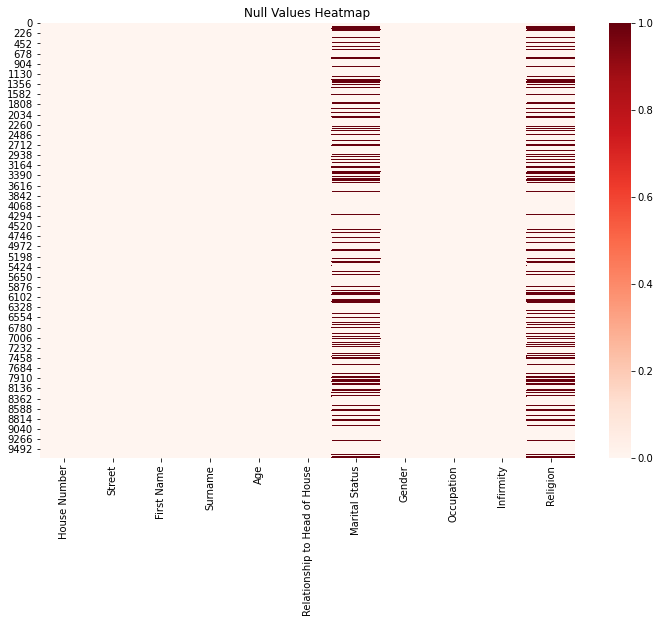

In [9]:
#lets visualize the missing values
plt.figure(figsize = (12,8))

sns.heatmap(data.isnull(),cmap = 'Reds')
plt.title('Null Values Heatmap')
plt.show()

# EXPLORATORY DATA ANALYSIS (DATA CLEANING)

## FEAUTURES DESCRIPTION 
 LET'S EXPLORE EACH FEATURES IN THE DATASET

## Age

In [10]:
#check for the total counts of each unique values 
data['Age'].value_counts()

19             185
20             180
37             175
41             174
42             172
              ... 
80.21545403      1
41.4             1
three            1
96               1
102              1
Name: Age, Length: 119, dtype: int64

In [11]:
#check for the presence of unique features
data['Age'].unique()

array(['31', '91', '88', '73', '41', '43', '5', '53', '54', '85', '71',
       '22', '70', '60', '95', '96', '80', '34', '38', '65', '64', '57',
       '35', '37', '72', '3', '32', '1', '69', '59', '62', '33', '30',
       '46', '48', '19', '18', '16', '15', '24', '0', '27', '14', '10',
       '6', '45', '47', '9', '23', '36', '21', '20', '55', '25', '13',
       '2', '74', '50', '44', '49', '56', '42', '40', '17', '12', '11',
       '67', '28', '8', '39', '7', '76', '78', '66', '29', '26', '58',
       '81', '61', '52', 'three', '79', '82', '51', '4', '83', '63', '77',
       '68', '84', '87', '89', '75', '93', '11.1', '97', '86', '92', '94',
       '90', '101', '103', '100', ' ', 'twelve', '-1', '0.3', '41.4',
       '104', '322', '99', '80.21545403', '82.21545403', '102',
       '91.97455657', '93.97455657', '28.0', '105', '107'], dtype=object)

## Observation
checking for the unique values shows we have different ages, some occured as a decimal, in words, in negative values. Also, we have outliers and blanks spaces. Now,let's check for the amount of blank spaces in the age feature.
Impute -1 as 1 because the entry is a twin child and the age was infer from the household data

In [12]:
#replace all dirty/inappropriate data with the most appropriate imputation.
data = data.replace({'Age' : { 'twelve': 12, 'three': 3, '-1': 1 }})

In [13]:
#check for the presence of blank space
data[data['Age']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4594,28,Honeysucklebag Avenue,Billy,Smith,,Husband,Married,Male,Air cabin crew,None,Methodist
8813,28,Yellow Inlet,Malcolm,Johnson,,Husband,Married,Male,Office manager,None,Muslim


In [14]:
#impute blank space for entry 4594 and 8813's ages. The ages were inferred from household data of the wife's ages
data.loc[4594,'Age'] = 62
data.loc[8813,'Age'] = 35

In [15]:
data['Age'].dtype

dtype('O')

Since the datatype is not in the correct type, lets convert the type from string to integers.

In [16]:
data['Age'] = data['Age'].astype('float')

In [17]:
data['Age'] = data['Age'].astype('int')

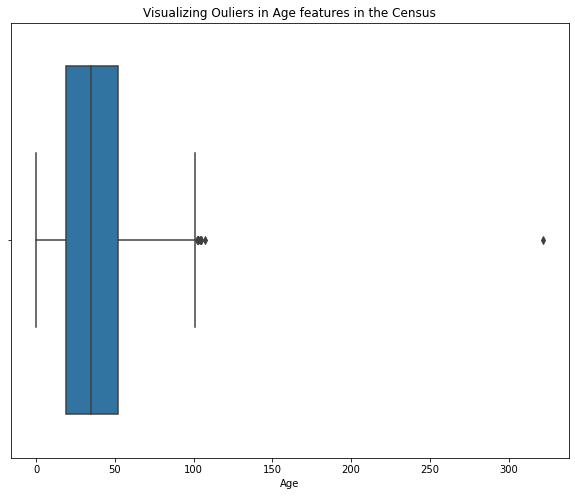

In [18]:
#Visualizing Ouliers in Age features in the Census
plt.figure(figsize = (10,8))
sns.boxplot(data['Age'])
plt.title('Visualizing Ouliers in Age features in the Census')
plt.show()

## Observation
the boxplot shows the presence of outliers in ages. There is age 322 which is an outlier.
Impute 322 as 32 because the age seems incorrect as no human as lived that long. The entry is a male lodger with a career in health, I will assume the age as an imputational error(i.e the digit 2 was repeated twice)

In [19]:
#replace all dirty/inappropriate data with the most appropriate imputation.
data['Age'] = data['Age'].replace(322, 32)

In [20]:
data['Age'].dtype

dtype('int64')

In [21]:
#check .unique() to be sure the data is thoroughly cleaned
data['Age'].unique()

array([ 31,  91,  88,  73,  41,  43,   5,  53,  54,  85,  71,  22,  70,
        60,  95,  96,  80,  34,  38,  65,  64,  57,  35,  37,  72,   3,
        32,   1,  69,  59,  62,  33,  30,  46,  48,  19,  18,  16,  15,
        24,   0,  27,  14,  10,   6,  45,  47,   9,  23,  36,  21,  20,
        55,  25,  13,   2,  74,  50,  44,  49,  56,  42,  40,  17,  12,
        11,  67,  28,   8,  39,   7,  76,  78,  66,  29,  26,  58,  81,
        61,  52,  79,  82,  51,   4,  83,  63,  77,  68,  84,  87,  89,
        75,  93,  97,  86,  92,  94,  90, 101, 103, 100, 104,  99, 102,
       105, 107])

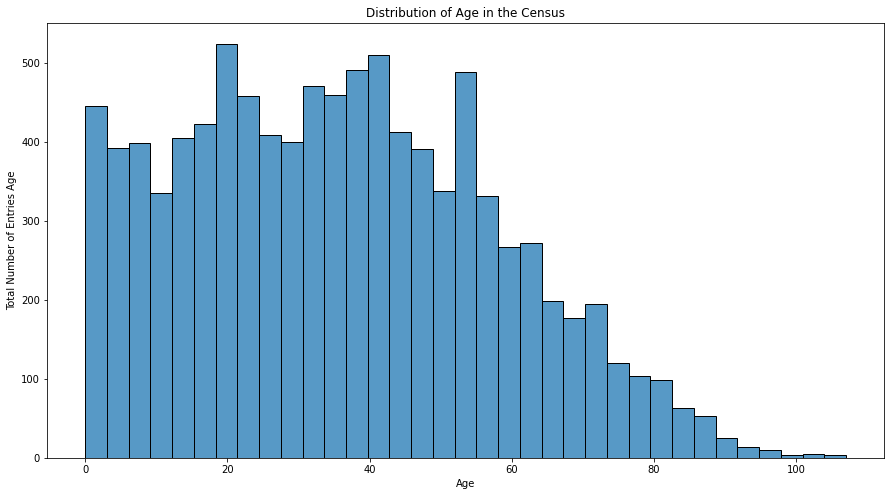

In [22]:
#visualizing the Distribution of Age in the Census
plt.figure(figsize = (15,8))

sns.histplot(data['Age'])
plt.ylabel('Total Number of Entries Age')
plt.title('Distribution of Age in the Census')
plt.show()

## Religion

In [23]:
#check for the total counts of each unique values 
data['Religion'].value_counts()

None         3257
Christian    2142
Catholic      992
Methodist     721
Muslim        132
Sikh           71
Jewish         59
Buddist         2
                2
Hindu           2
Jedi            1
Female          1
Undecided       1
Baptist         1
Quaker          1
Private         1
Sith            1
Orthodoxy       1
Bahai           1
Name: Religion, dtype: int64

In [24]:
#let's view the blank space
data[data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6954,51,Mercia Lane,Brandon,Adams,28,Head,Single,Male,Warden/ranger,None,
6955,51,Mercia Lane,Alice,Byrne,26,Partner,Single,Female,Energy manager,None,


In [25]:
#replace all dirty/inappropriate data with the most appropriate imputation.
data = data.replace({'Religion' : { ' ': 'None', 'Female': 'None','Quaker': 'None', 'Sith': 'None', 'Jedi': 'None', 'Private': 'None', 'Undecided': 'None', 
                     'Orthodoxy':'Christian','Baptist':'Christian'}})

In [26]:
# data = data.replace({'Religion' : { ' ': 'None', 'Female': 'None','Quaker': 'None', 'Sith': 'None', 'Jedi': 'None', 'Private': 'None', 'Undecided': 'None', 
#                      'Orthodoxy':'Christian','Baptist':'Christian','Methodist':'Christian','Catholic':'Christian' }})

In [27]:
#Removing the missing values in religion by using manual imputation
#Religion has 2298, we can assume they didn't fill it because they done have any religion

data['Religion'] = data['Religion'].fillna('None')

In [28]:
#check .unique() to be sure the data is thoroughly cleaned
data['Religion'].unique()

array(['Methodist', 'Catholic', 'None', 'Christian', 'Muslim', 'Jewish',
       'Sikh', 'Bahai', 'Hindu', 'Buddist'], dtype=object)

None         5563
Christian    2144
Catholic      992
Methodist     721
Muslim        132
Sikh           71
Jewish         59
Buddist         2
Hindu           2
Bahai           1
Name: Religion, dtype: int64


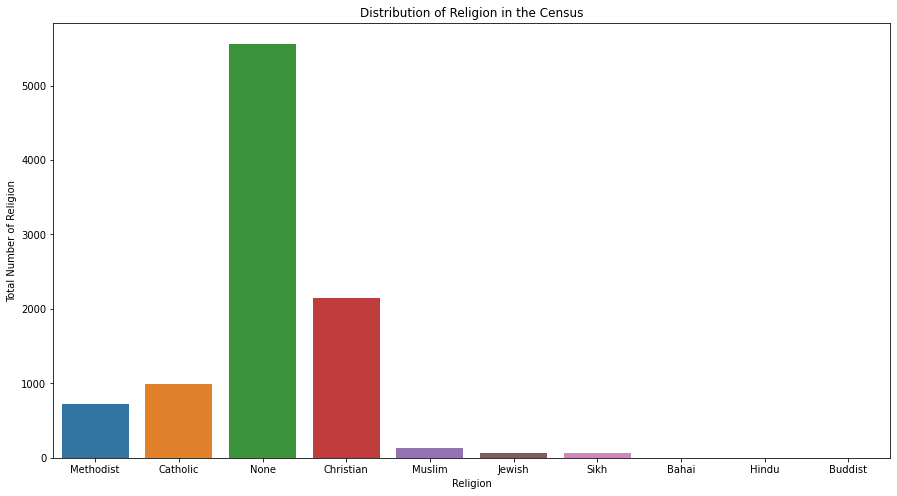

In [29]:
print(data['Religion'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(data['Religion'])

plt.ylabel('Total Number of Religion')
plt.title('Distribution of Religion in the Census')
plt.show()

## Observation
the chart above shows the community has the highest religion to be people without any religion. followed by the christainity, the least was Bahai with 1 individual.
This distribution shows the community has a lot of growing religions.

## GENDER

In [30]:
#check for the total counts of each unique values 
data['Gender'].value_counts()

Female    5088
Male      4586
FEMALE       2
M            2
MALE         2
             2
F-male       1
F            1
Name: Gender, dtype: int64

In [31]:
#check for the presence of unique features
data['Gender'].unique()

array(['Female', 'Male', 'MALE', 'F-male', ' ', 'M', 'FEMALE', nan, 'F'],
      dtype=object)

## OBSERVATION
From the cell above, there is presence of missing data, and blank spaces. Also some entries are misspelt and incorrect. Let's fixed this entries with appropriate values.

In [32]:
#replace all dirty/inappropriate data with the most appropriate imputation
data = data.replace({'Gender' : { 'MALE': 'Male', 'M': 'Male', 'F-male' : 'Female', 'FEMALE': 'Female','F' : 'Female'}})

In [33]:
#let's view the blank space
data[data['Gender'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1948,40,Dove Road,Francesca,Smith,18,None,Single,,University Student,None,None
2938,73,Lee Stravenue,Stephanie,Ball,33,Lodger,Divorced,,"Engineer, drilling",None,Christian


In [34]:
#replacing ' ' in row 1948 and 2938 with female because their first name souns femimine
data['Gender'] = data['Gender'].replace(' ', 'Female')

In [35]:
data['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [36]:
#filtering the NaN from the data by inferring from household data
data.loc[5215 : 5217]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5215,136,Baker Land,Annette,Robinson,26,Head,Married,NaN,Forensic scientist,None,None
5216,136,Baker Land,Guy,Robinson,31,Husband,Married,NaN,Camera operator,None,None
5217,136,Baker Land,Darren,Robinson,2,Son,NaN,NaN,Child,None,None


In [37]:
#replacing NaN values in row 5215, 5216 and 5217 with their respective gender according to the pattterns and realtionsip 
#with other family member in the data. firstly, 5217 is a male because the Relationship to Head of House states 'son', 
#5216's gender is male because Relationship to Head of House states 'Husband' and lastly, 5215 is the wife of 5216 according
#to the data meaning the gender is 'female'

data.loc[5215,'Gender'] = 'Female'
data.loc[5216,'Gender'] = 'Male'
data.loc[5217,'Gender'] = 'Male'

In [38]:
#check .unique() to be sure the data is thoroughly cleaned
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

19     185
20     180
37     175
41     175
42     172
      ... 
101      1
99       1
104      1
96       1
107      1
Name: Age, Length: 106, dtype: int64


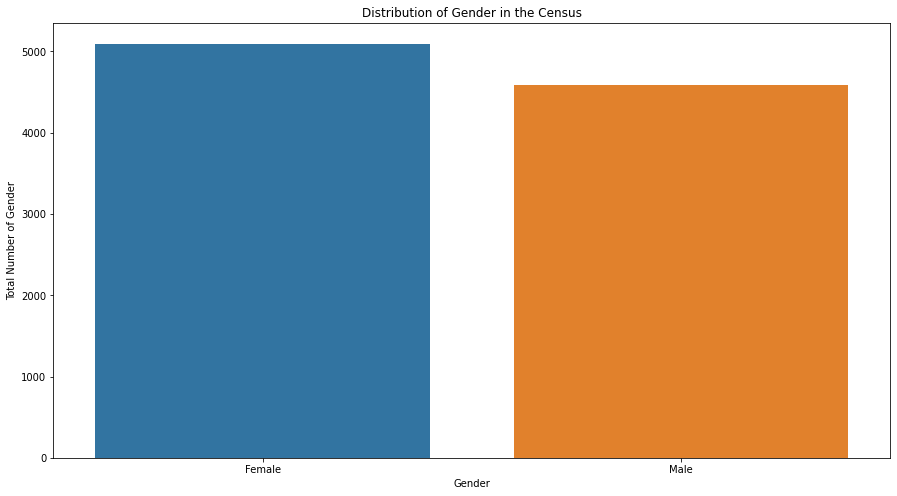

In [39]:
#check for the total counts of each unique values 
print(data['Age'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(data['Gender'])

plt.title('Distribution of Gender in the Census')
plt.ylabel('Total Number of Gender')
plt.show()

## Observation
the chart avove shows the community has more females than males.

In [40]:
#check for the presence of unique features
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [41]:
data[data['House Number'] == "nine"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2405,nine,Solsticekit Lane,Derek,Williams,22,Husband,Married,Male,University Student,None,None


In [42]:
data.loc[2405,'House Number'] = 9

In [43]:
#locating enries with missing value in 'House Number' column
data.loc[[8796,4951,6726,8796]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8796,NaN,Yellow Inlet,Mitchell,Shaw,33,Husband,Married,Male,Toxicologist,None,None
4951,NaN,Baker Land,Jennifer,Parker,8,Daughter,NaN,Female,Student,None,None
6726,NaN,Gregory Rapids,Harriet,Thomas,41,Head,Single,Female,Sports development officer,None,None
8796,NaN,Yellow Inlet,Mitchell,Shaw,33,Husband,Married,Male,Toxicologist,None,None


In [44]:
#filling the missing values with the appropriate number by inferring from household data and drawing patterns with other entries

data.loc[4951,'House Number'] = 62
data.loc[6675,'House Number'] = 13
data.loc[6726,'House Number'] = 29
data.loc[8796,'House Number'] = 21

In [45]:
#check for the presence of unique features to be sure the data has been cleaned
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [46]:
#change datatype to integer
data['House Number'] = data['House Number'].astype('int')

In [47]:
data['House Number'].dtype

dtype('int64')

# Street

In [48]:
#only a row is missing in street and we filling it with forward fill because of patterns in the data therefore we will infer from the household data
data['Street'] = data['Street'].fillna(method = 'ffill')

# First Name

In [49]:
#filtering data for quality checks (first and surname)
data.loc[8849:8852]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8849,42,Yellow Inlet,Julie,Heath,24,Partner,Single,Female,Market researcher,None,None
8850,43,Yellow Inlet,Antony,Sullivan,32,Head,Single,Male,"Designer, ceramics/pottery",None,Christian
8851,43,Yellow Inlet,NaN,Joanna Butler,59,None,Single,Female,"Teacher, English as a foreign language",None,Methodist
8852,43,Yellow Inlet,Victoria,Webb,35,None,Single,Female,Solicitor,None,Catholic


In [50]:
#There are 2 missing values in the column ' first name', since i cant leave the place empty and i dont want to drop the column 
#because it continues useful information and neither as any other missing value. I imputed row 7316 with his surname and 8851 with
#'Joanna' because was writing in the surname column which could have been a mistake


data.loc[7316,'First Name'] = 'Giles'
data.loc[8851,'First Name'] = 'Joanna'

# Surname

In [51]:
#replacing 'Joanna Butler' in row 8851 with Butler because there is no hypen to signify its a company name and first_name was 
#missing so I would assume it was an imputation error
data['Surname'] = data['Surname'].replace('Joanna Butler', 'Butler')

In [52]:
#only a row is missing in surname and we filling it with backward fill because of patterns in the data. the entry is the head of
#the Richardson family
data['Surname'] = data['Surname'].fillna(method = 'bfill')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9687 entries, 0 to 9686
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9687 non-null   int64 
 1   Street                         9687 non-null   object
 2   First Name                     9687 non-null   object
 3   Surname                        9687 non-null   object
 4   Age                            9687 non-null   int64 
 5   Relationship to Head of House  9686 non-null   object
 6   Marital Status                 7440 non-null   object
 7   Gender                         9687 non-null   object
 8   Occupation                     9687 non-null   object
 9   Infirmity                      9687 non-null   object
 10  Religion                       9687 non-null   object
dtypes: int64(2), object(9)
memory usage: 832.6+ KB


# Relationship to Head of House

In [54]:
#check for the presence of unique features
data['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Husband', 'Daughter', 'Son', 'Partner',
       'Grandson', 'Lodger', 'None', 'Step-Daughter', 'Granddaughter',
       'Visitor', 'Adopted Son', 'Cousin', 'Adopted Granddaughter',
       'Sibling', 'Step-Son', 'Adopted Daughter', 'Neice', 'Son-in-law',
       'Nephew', nan, ' '], dtype=object)

## OBSERVATION
There are presence of unique values, missing values and blanks in the Relationship to Head of House feature.
There are entries called adopted son, step son and son same as adopted daughter, step daughter and daughter.
what should be done this entry as they all have distinct meanings. Adopted son/daughter is a child that has been legally taken by another family to be taken care of as their own child.
while step son/daughter is a child of one's husband or wife by a previous marriage. Considering this definition an Adopted son/daughter can be classified as one's child, therefore i will replace all adopted son/daughter/grand daughter with son/ daughter/grand daughter respectively. 

In [55]:
#replace all dirty/inappropriate data with the most appropriate imputation.
data = data.replace({'Relationship to Head of House' : {  'Adopted Son': 'Son', 'Adopted Daughter': 'Daughter','Adopted Granddaughter': 'Granddaughter'}})

In [56]:
#let's view the blank space
data[data['Relationship to Head of House'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9463,11,Morgan Common,Naomi,Houghton,60,,Divorced,Female,Unemployed,None,Christian


In [57]:
#replacing the " " in row 9463 with 'head' according to relationship with other entries

data.loc[9463,'Relationship to Head of House'] = 'Head'

In [58]:
#filling the missing values with the appropriate number by drawing patterns with other entries, row 8386 is the head according to relationship with other entries

data['Relationship to Head of House'] = data['Relationship to Head of House'].fillna('Head')

Head             3422
Son              1628
Daughter         1592
Husband           867
None              725
Lodger            488
Wife              343
Partner           254
Grandson           98
Granddaughter      81
Sibling            58
Cousin             38
Visitor            30
Step-Daughter      28
Step-Son           26
Neice               5
Nephew              3
Son-in-law          1
Name: Relationship to Head of House, dtype: int64


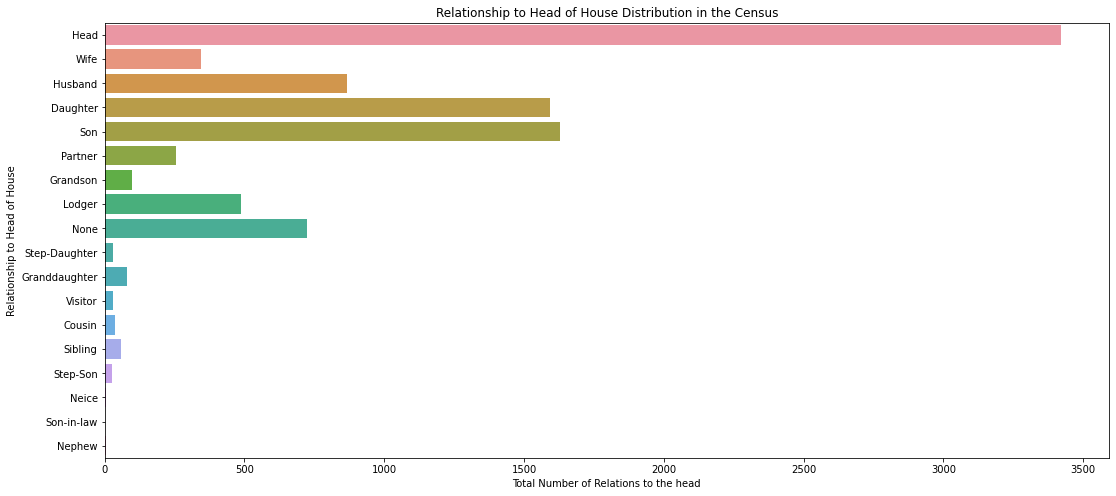

In [59]:
#check for the total counts of each unique values 
print(data['Relationship to Head of House'].value_counts())

plt.figure(figsize = (18,8))
sns.countplot(y = data['Relationship to Head of House'])

plt.title('Relationship to Head of House Distribution in the Census')
plt.xlabel('Total Number of Relations to the head')
plt.show()

## Observation
the chart above shows the community has the highest to be head, followed by son, the least was son-in-law with 1 individual.
This distribution shows the community has lodgers with value counts of 488.

# Marital Status

In [60]:
#check for the presence of unique features
data['Marital Status'].unique()

array(['Single', 'Widowed', 'Married', nan, 'Divorced', 'M', 'S'],
      dtype=object)

## Observation
The cell above shows the presences of missing data and misspelt entry which should be fixed appropriately

In [61]:
#replace all dirty/inappropriate data with the most appropriate imputation.
data = data.replace({'Marital Status' : { 'M': 'Married', 'S': 'Single'}})

In [62]:
data['Marital Status'].mode()

0    Single
dtype: object

In [63]:
#filling the missing values with Single because the missing values falls betwwen are 0 - 20

data['Marital Status'] = data['Marital Status'].fillna('Single')

Single      5761
Married     2430
Divorced    1033
Widowed      463
Name: Marital Status, dtype: int64


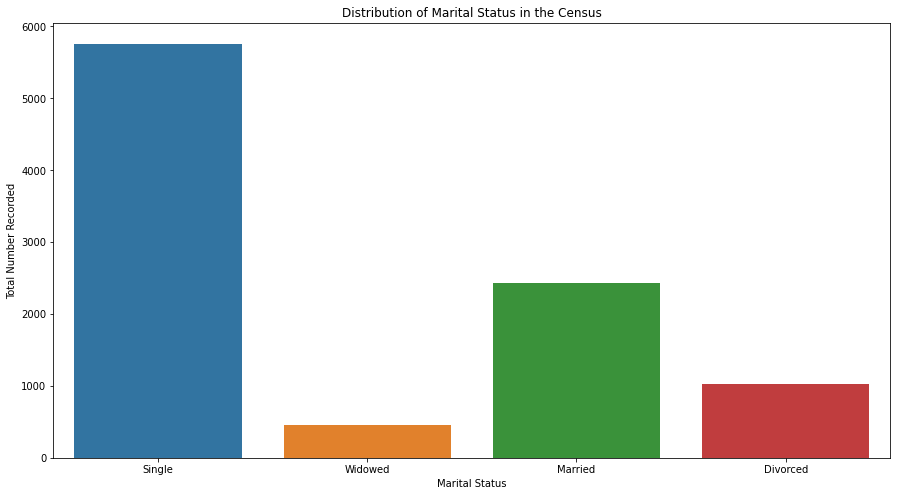

In [64]:
print(data['Marital Status'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(data['Marital Status'])

plt.title('Distribution of Marital Status in the Census')
plt.ylabel('Total Number Recorded')
plt.show()

## Observation
the chart above shows the community has the highest marital status to be singles,followed by married, the least was Widowed with 463 individuals.
This distribution shows the community has a lot of single people in age range 0-20, which makes sence since minors shouldn't be married.

# Infirmity

In [65]:
#check for the presence of unique features
data['Infirmity'].unique()

array(['None', 'Deaf', 'Unknown Infection', 'Mental Disability',
       'Physical Disability', ' ', 'Blind', 'Disabled', 'Female'],
      dtype=object)

## Observation
The cell above shows presences of blank spaces and some incorrect infirmity.

In [66]:
#let's view the blank spaces
data[data['Infirmity'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1103,52,Cook Coves,Alexandra,Gray,30,Head,Single,Female,Unemployed,,None
1304,48,Brightwater Locks,Ruth,Smith,45,Head,Single,Female,Software engineer,,Catholic
1451,47,Silver Wells,Claire,Wilson,17,Daughter,Single,Female,Student,,None
2761,48,Lee Stravenue,Jane,Mason,46,Lodger,Single,Female,Insurance broker,,Catholic
3137,109,Lee Stravenue,Stacey,Watts,39,Lodger,Single,Female,Agricultural engineer,,None
4054,46,Bishop Road,Sean,Duncan,76,Head,Widowed,Male,Retired Biomedical engineer,,Christian
4785,20,Baker Land,Kathryn,Kirk,3,Daughter,Single,Female,Child,,None
4985,73,Baker Land,Tracy,Patel,31,Head,Single,Female,Television floor manager,,None
5050,92,Baker Land,Helen,Hughes,38,Head,Single,Female,Ship broker,,None
6821,56,Gregory Rapids,Callum,Green,49,None,Single,Male,Civil Service administrator,,None


In [67]:
#replacing rows with ' ' in infirmity with 'None', i would assume they done have any that's why the question was left blank.

data['Infirmity'] = data['Infirmity'].replace(' ', 'None')
data['Infirmity'] = data['Infirmity'].replace('Female', 'None')

None                   9617
Physical Disability      19
Deaf                     12
Blind                    12
Unknown Infection        11
Disabled                  8
Mental Disability         8
Name: Infirmity, dtype: int64


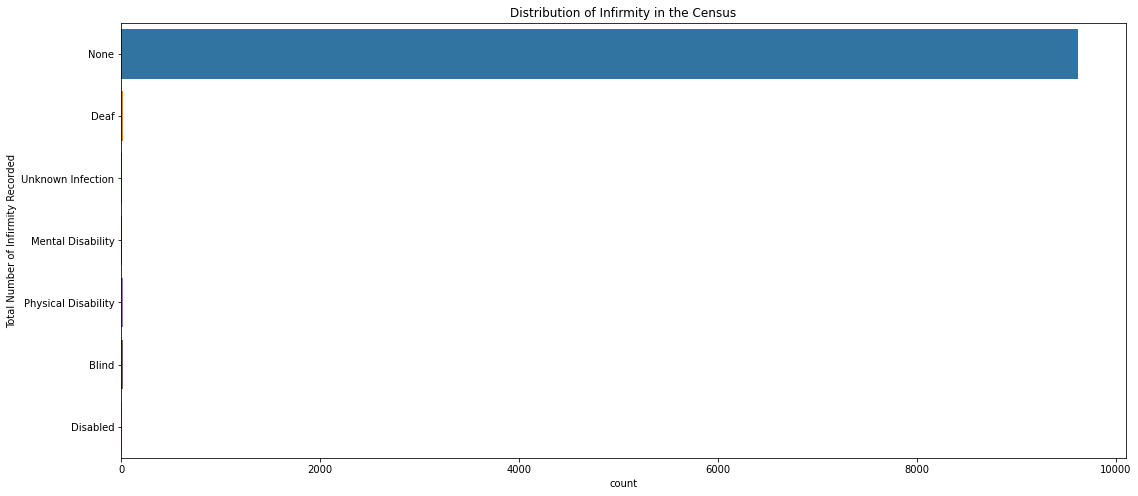

In [68]:
#check for the total counts of each unique values 
print(data['Infirmity'].value_counts())

plt.figure(figsize = (18,8))
sns.countplot(y = data['Infirmity'])

plt.title('Distribution of Infirmity in the Census')
plt.ylabel('Total Number of Infirmity Recorded')
plt.show()

In [69]:
## Observation


# Occupation

In [70]:
#check for the presence of unique features
data['Occupation'].unique()

array(['Producer, radio', 'Retired Administrator, sports',
       'Retired Bookseller', ..., 'Retired Therapist, music',
       'Retired Clinical biochemist', 'Retired Art gallery manager'],
      dtype=object)

## Observation
The cell above shows different variations of occupation ranginging from retired to umemployed, students and employed people. Also, it has some blank spaces.

In [71]:
#Let's view the blank spaces
data[data['Occupation'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6213,9,Pearson Drive,Brandon,Burke,7,Son,Single,Male,,None,None
6846,6,Mercia Lane,Martin,Ingram,8,Son,Single,Male,,None,None


In [72]:
#replacing ' ' in row 6213 and 6846 with 'Student' because they are both 7 and 8 years old, which i will assume they are not at the working class age.

data['Occupation'] = data['Occupation'].replace(' ', 'Student')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9687 entries, 0 to 9686
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9687 non-null   int64 
 1   Street                         9687 non-null   object
 2   First Name                     9687 non-null   object
 3   Surname                        9687 non-null   object
 4   Age                            9687 non-null   int64 
 5   Relationship to Head of House  9687 non-null   object
 6   Marital Status                 9687 non-null   object
 7   Gender                         9687 non-null   object
 8   Occupation                     9687 non-null   object
 9   Infirmity                      9687 non-null   object
 10  Religion                       9687 non-null   object
dtypes: int64(2), object(9)
memory usage: 832.6+ KB


In [74]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
House Number,9687.0,NaN,NaN,NaN,46.211521,51.452912,1.0,11.0,26.0,54.0,228.0
Street,9687,105,Lee Stravenue,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name,9687,371,Richard,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,9687,667,Smith,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9687.0,NaN,NaN,NaN,35.91277,21.653116,0.0,19.0,35.0,52.0,107.0
Relationship to Head of House,9687,18,Head,3422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,9687,4,Single,5761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9687,2,Female,5095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,9687,1108,Student,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infirmity,9687,7,None,9617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA ANALYSIS AND VISUALIZATION

# Employement/Unemployment Distribution

In [75]:
data['Occupation'].unique()

array(['Producer, radio', 'Retired Administrator, sports',
       'Retired Bookseller', ..., 'Retired Therapist, music',
       'Retired Clinical biochemist', 'Retired Art gallery manager'],
      dtype=object)

Since we have diffrent variations of occupation, lets categories into respective classes see below for how they are re classsified and append to the census data into a new feature called Employment Status

In [76]:
EmploymentStatus = []

for info in data['Occupation']:
    if info == 'Student':
        EmploymentStatus.append('Student')
    elif info == 'University Student':
        EmploymentStatus.append('University Student')
    elif info == 'Child':
        EmploymentStatus.append('Child')
    elif info == 'Unemployed':
        EmploymentStatus.append('Unemployed')
    elif 'Retired' in info:
        EmploymentStatus.append('Retired')
    else:
        EmploymentStatus.append('Employed')
            

In [77]:
#casting the 'Employment Status' into the census data
data['Employment Status'] = EmploymentStatus

In [78]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist,Employed
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic,Retired
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None,Retired
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None,Retired
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian,Retired


In [79]:
#check .unique() to be sure the data is thoroughly cleaned
data['Employment Status'].unique()

array(['Employed', 'Retired', 'Student', 'University Student',
       'Unemployed', 'Child'], dtype=object)

Employed              5193
Student               1808
Retired                837
University Student     664
Unemployed             630
Child                  555
Name: Employment Status, dtype: int64


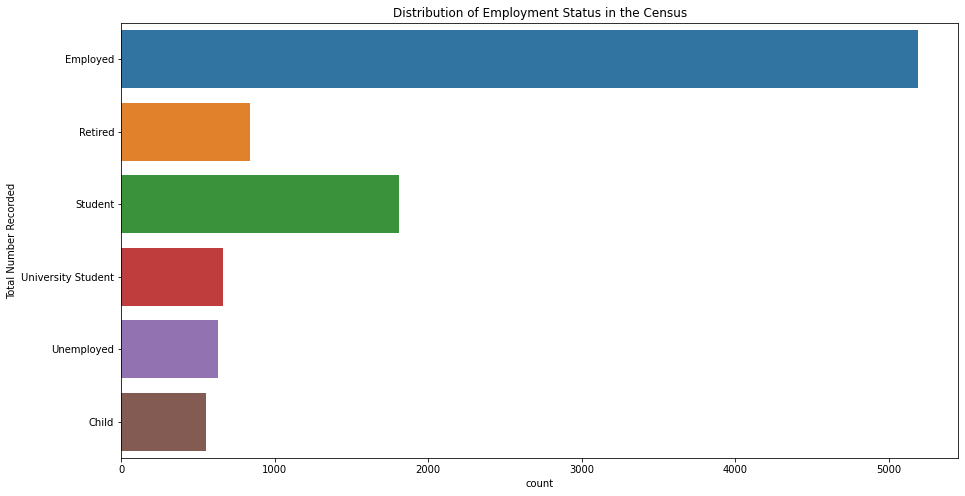

In [80]:
print(data['Employment Status'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(y = 'Employment Status', data=data)

plt.title('Distribution of Employment Status in the Census')
plt.ylabel('Total Number Recorded')
plt.show()

## Observation
The chart above shows the community has employed to be the highest employment status, followed by student, the least was Child with 555 individuals.
This distribution shows the community has high proportion of employed, students and university which we can constitutes commuters since they are either commuting to work, school or both. Let's visualize the age distribution of the employement status.

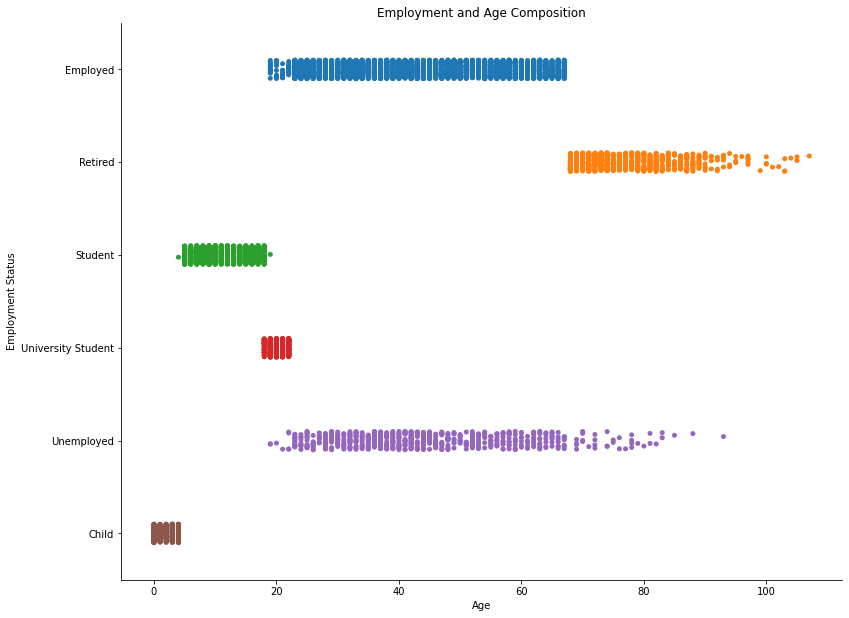

In [81]:
cat3 = sns.catplot(y="Employment Status", x="Age", data=data, height=8.27, aspect=11.7/8.27 )
cat3.set(title = 'Employment and Age Composition')

## Observation
This distribution shows the community has some unemployed individuals, lets check for the proportion of umemployed at a working-class age of < 65 age.

In [82]:
all_unemployed = data[data['Employment Status']=='Unemployed']

In [83]:
#calculate the number of old age <65 that is umemployed
len(all_unemployed)

630

In [84]:
data['Age'].dtype

dtype('int64')

In [85]:
young_unemployed = data[(data['Age'] < 65) & (data['Employment Status'] == 'Unemployed')]

In [86]:
print('percentage of working-class age in the unemployment is ', round(len(young_unemployed)/len(all_unemployed)*100), '%')

percentage of working-class age in the unemployment is  91 %


# Umployment Status and infirmity
This is to know if unemployment status is because of health issue

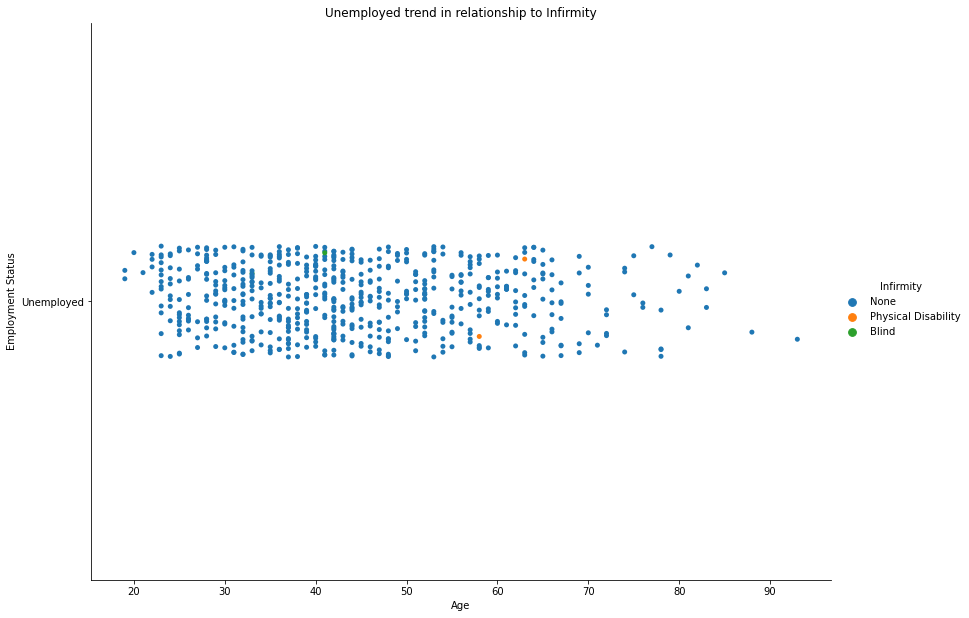

In [87]:
cat4 = sns.catplot(y="Employment Status", x="Age", hue = "Infirmity",data= all_unemployed, height=8.27, aspect=11.7/8.27 )
cat4.set(title = 'Unemployed trend in relationship to Infirmity')

## Observation
This distribution shows just 3 umemployed individual with infirmity. So therefore, the unemployement ia not as a result of an illness. Hence, training can be incorporated for these individual to improve their skills and increase their chance of getting a job.

In [88]:
unemploy_age = data

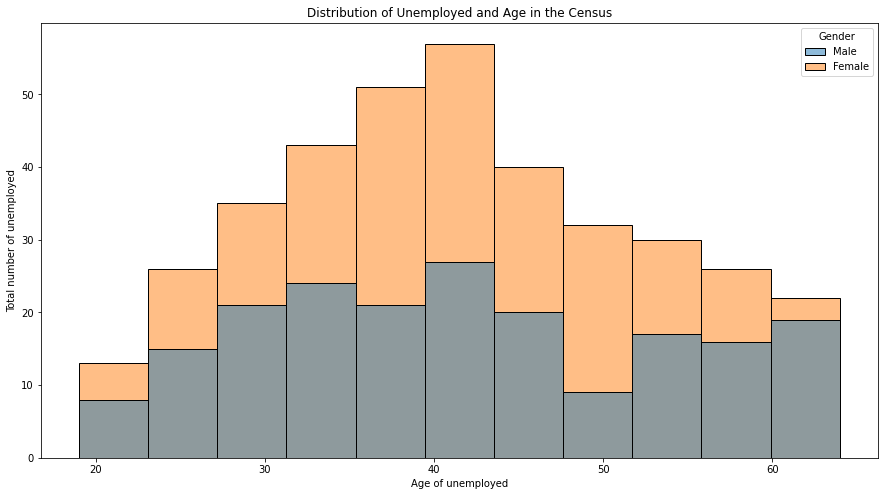

In [89]:
#visualizing the Distribution of Age in the Census
plt.figure(figsize = (15,8))

sns.histplot(x = 'Age',  data = young_unemployed, hue ='Gender')
plt.xlabel('Age of unemployed')
plt.ylabel('Total number of unemployed')
plt.title('Distribution of Unemployed and Age in the Census')
plt.show()

## Age Pyramid

In [90]:
df = data.copy()

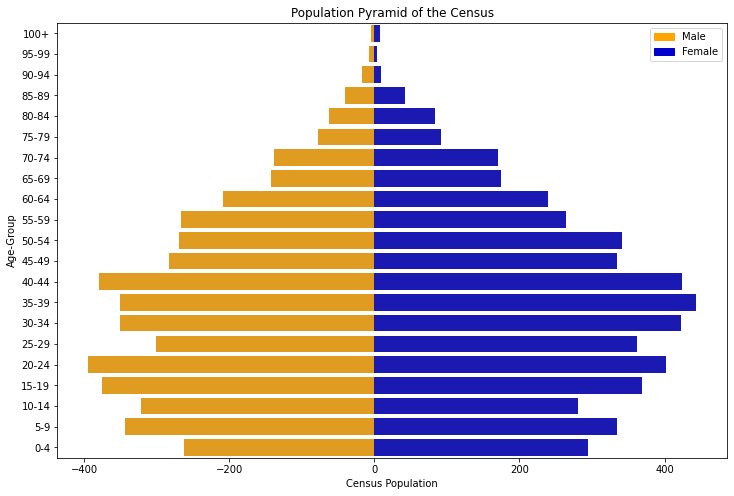

In [91]:
def get_age_range(df, gender, start_age, end_age):
    '''Returns the number of persons of a specified gender within a specified age range.'''
    return df[(df['Gender']==gender)&(df["Age"] >= start_age)&(df['Age'] <= end_age)].count()['Gender']
age_range = [
    '0-4','5-9','10-14','15-19','20-24','25-29', '30-34',
    '35-39','40-44','45-49','50-54','55-59',
    '60-64','65-69','70-74','75-79','80-84','85-89',
    '90-94','95-99','100+']
m=[]
f=[]
for ar in age_range:
    start=0
    end=0
    if '-' in ar:
        age = ar.split('-')
        start = int(age[0])
        end = int(age[1])
    else:
        # This is 100. Deal with it manually. (because... lazy)
        start = 100
        end = 200
    m.append(-1* get_age_range(df, 'Male', start, end))
    f.append(get_age_range(df,'Female', start, end))
pdf = pd.DataFrame({'Age': age_range, 'Male': m, 'Female': f})
AgeClass = [
    '100+','95-99','90-94','85-89','80-84','75-79',
    '70-74','65-69','60-64','55-59','50-54','45-49',
    '40-44','35-39','30-34','25-29','20-24','15-19',
    '10-14','5-9','0-4']

plt.figure(figsize = (12,8))
bar_plot = sns.barplot(x='Male', y='Age', data=pdf, order=AgeClass, color = 'orange')
bar_plot = sns.barplot(x='Female', y='Age', data=pdf, order=AgeClass, color = 'mediumblue')
bar_plot.set(xlabel="Census Population", ylabel="Age-Group", title = "Population Pyramid of the Census")


type(bar_plot)

Male = mpatches.Patch(color = 'orange', label = 'Male')
Female = mpatches.Patch(color = 'mediumblue', label = 'Female')
plt.legend(handles = [Male,Female])

## OBSERVATION
From the above chart, we observed that the census is a growing population with the highest distribution among middle-aged group of 40-44 years and the lowest distribution is among old-aged group of 95-99 years.

In [92]:
#check for the total counts of each unique values 
print(data['Gender'].value_counts())

Female    5095
Male      4592
Name: Gender, dtype: int64


## Marital status and age

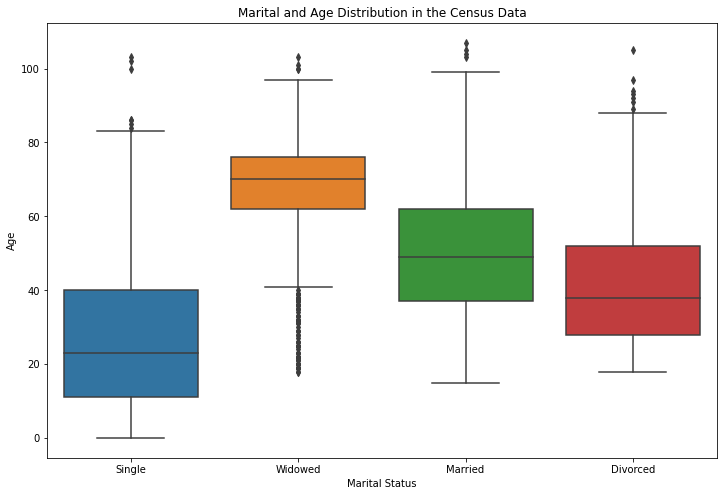

In [93]:
plt.figure(figsize = (12,8))
box = sns.boxplot(x = data['Marital Status'], y = data['Age'])
box.set(xlabel ='Marital Status', ylabel = 'Age', title = 'Marital and Age Distribution in the Census Data')
plt.show()

## Observation
The above distribution shows age range 0 t0 20 is single, which is correct as they are minors and shouldn't be married.

## HOUSEHOLD DISTRIBUTION

In [94]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist,Employed
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic,Retired
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None,Retired
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None,Retired
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian,Retired


Create a new feature in the census data called household to get an overview of how household is distributed. this is a combination of street and house number to understand the average family size of residents and possible housing structure.

In [95]:
data["Household"] = data['House Number'].astype(str) + data['Street']
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Household
0,1,Barry Avenue,Gail,Lamb,31,Head,Single,Female,"Producer, radio",None,Methodist,Employed,1Barry Avenue
1,2,Barry Avenue,Grace,Wells,91,Head,Widowed,Female,"Retired Administrator, sports",None,Catholic,Retired,2Barry Avenue
2,3,Barry Avenue,John,Rowley,88,Head,Married,Male,Retired Bookseller,None,None,Retired,3Barry Avenue
3,3,Barry Avenue,Andrea,Rowley,88,Wife,Married,Female,Retired Industrial buyer,None,None,Retired,3Barry Avenue
4,4,Barry Avenue,Jade,Morris,73,Head,Widowed,Female,"Retired Scientist, audiological",None,Christian,Retired,4Barry Avenue


In [96]:
#group household by count of household to know the size of each houshold
grouped_household = data.groupby('Household')["Household"].count()

In [97]:
grouped_household

Household
100Baker Land        5
100Bishop Road       2
100Jones Hill        2
100Lee Stravenue     5
100Silver Wells      1
                    ..
9Whitehead Street    2
9Wong Islands        2
9Yates Burg          3
9Yellow Inlet        2
9Yucca Square        3
Name: Household, Length: 3422, dtype: int64

In [98]:
grouped_household.describe()

count    3422.000000
mean        2.830801
std         2.181412
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: Household, dtype: float64

## Observation

The cell above shows the average family size in my census to be 2.83, Minimumis 1 while the Maximum family size is 22

## Age and Religion

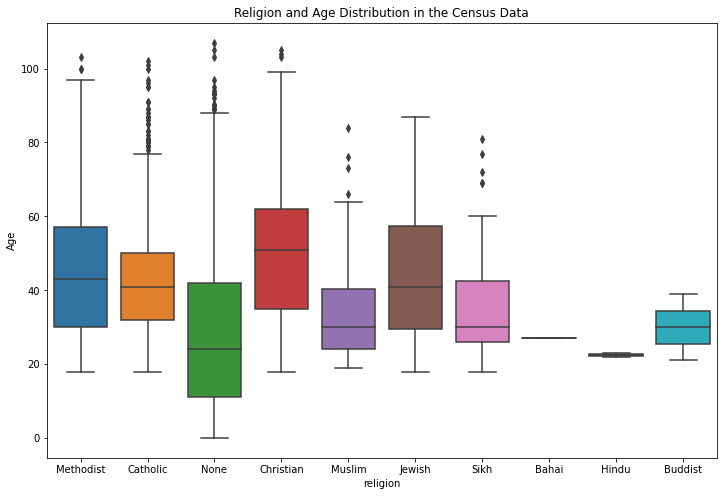

In [99]:
plt.figure(figsize = (12,8))
box = sns.boxplot(x = data['Religion'], y = data['Age'])
box.set(xlabel ='religion', ylabel = 'Age', title = 'Religion and Age Distribution in the Census Data')
plt.show()

In [100]:
data['Religion'].unique()

array(['Methodist', 'Catholic', 'None', 'Christian', 'Muslim', 'Jewish',
       'Sikh', 'Bahai', 'Hindu', 'Buddist'], dtype=object)

In [101]:
religion_list = ['Methodist', 'Catholic', 'None', 'Christian', 'Muslim', 'Jewish',
       'Sikh', 'Bahai', 'Hindu', 'Buddist']

for x in religion_list:
    mean_stats = data['Age'][data['Religion'] == x].mean()
    count_stats = data['Age'][data['Religion'] == x].count()
    range_stats = (data['Age'][data['Religion'] == x].max()) - (data['Age'][data['Religion'] == x].min())
    IQR = (data['Age'][data['Religion'] == x].quantile(0.75)) - (data['Age'][data['Religion'] == x].quantile(0.25))
    median = (data['Age'][data['Religion'] == x].quantile(0.50))
    print(x ,'- Mean:',round(mean_stats), 'Count:', count_stats,'Range:', range_stats, 'Median:', median, 'IQR:', round(IQR,))

Methodist - Mean: 45 Count: 721 Range: 85 Median: 43.0 IQR: 27
Catholic - Mean: 43 Count: 992 Range: 84 Median: 41.0 IQR: 18
None - Mean: 28 Count: 5563 Range: 107 Median: 24.0 IQR: 31
Christian - Mean: 49 Count: 2144 Range: 87 Median: 51.0 IQR: 27
Muslim - Mean: 34 Count: 132 Range: 65 Median: 30.0 IQR: 16
Jewish - Mean: 44 Count: 59 Range: 69 Median: 41.0 IQR: 28
Sikh - Mean: 35 Count: 71 Range: 63 Median: 30.0 IQR: 16
Bahai - Mean: 27 Count: 1 Range: 0 Median: 27.0 IQR: 0
Hindu - Mean: 22 Count: 2 Range: 1 Median: 22.5 IQR: 0
Buddist - Mean: 30 Count: 2 Range: 18 Median: 30.0 IQR: 9


In [102]:
#Methodist
data['Age'][data['Religion'] == 'Methodist'].describe()

count    721.000000
mean      44.694868
std       18.566430
min       18.000000
25%       30.000000
50%       43.000000
75%       57.000000
max      103.000000
Name: Age, dtype: float64

In [103]:
data['Religion'].value_counts()

None         5563
Christian    2144
Catholic      992
Methodist     721
Muslim        132
Sikh           71
Jewish         59
Buddist         2
Hindu           2
Bahai           1
Name: Religion, dtype: int64

## Age and relationship to the head of the house with relations to marital status

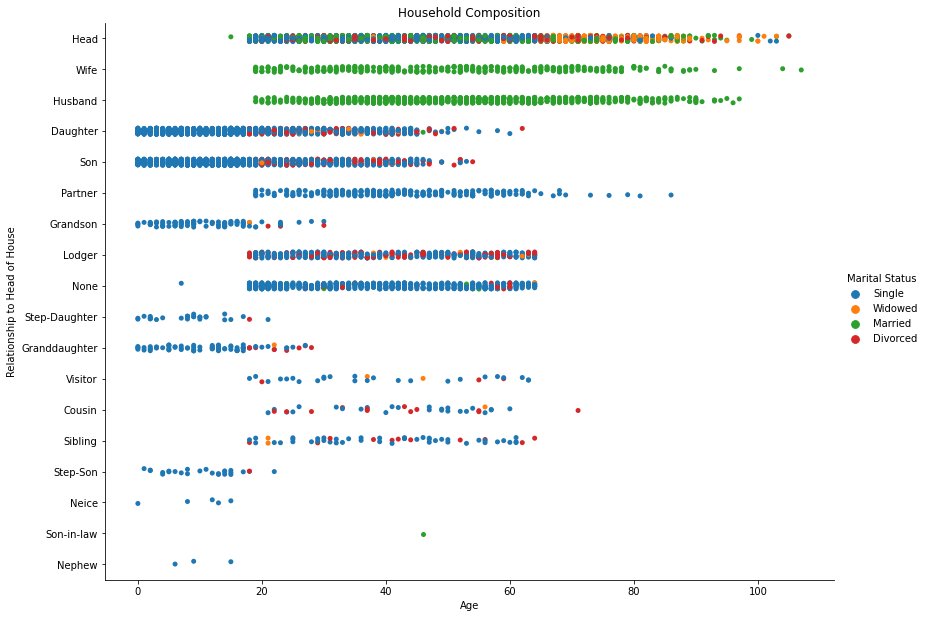

In [104]:
cat = sns.catplot(x="Age", y="Relationship to Head of House", hue="Marital Status", data = data, height=8.27, aspect=11.7/8.27 )
cat.set(title = 'Household Composition')

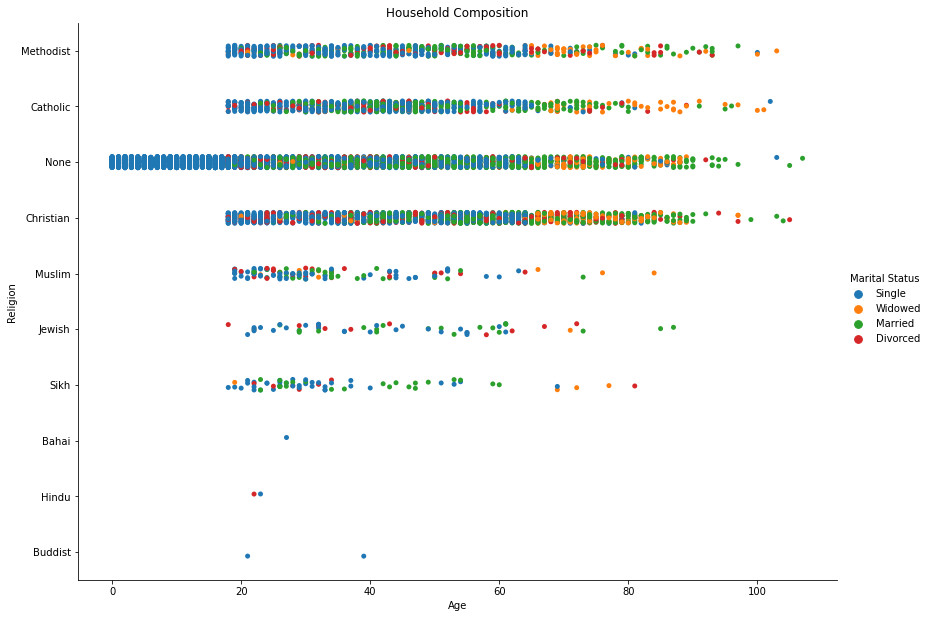

In [105]:
cat2 = sns.catplot(x="Age", y="Religion", hue="Marital Status", data=data, height=8.27, aspect=11.7/8.27 )
cat2.set(title = 'Household Composition')

## Birthrate

Birthrate =   (Number of lives births occuring in the year)/(Average population in the year) ×10000

Birthrate =   94/9687 ×10000 
                
         940000/9687 = 97


In [106]:
child_zero = data[data['Age'] == 0]

In [107]:
len(child_zero)

94

In [108]:
birth_rate = (len(child_zero)/len(data)) * 10000
print('The Birthrate in the census is',round(birth_rate), 'per 10000')

The Birthrate in the census is 97 per 10000


## Evolving Birthrate

In [109]:
child_4 = data[data['Age'] == 4]
len(child_4)

111

In [110]:
Evol_birth_rate = (len(child_4)/len(data)) * 10000
print('The Evolving Birthrate in the census is', round(Evol_birth_rate),'per 10000')

The Evolving Birthrate in the census is 115 per 10000


## Death Rate

Death rate =   (Number of deaths during the year 2009)/(mid-year population ) ×100000

Death rate =   114/9687 ×100000 = 11400000/9687 = 1177


In [111]:
old_pop = data[data['Age'].between(65,107)].groupby('Age').size().sort_index(ascending=False)
old_pop

Age
107     1
105     2
104     1
103     3
102     1
101     1
100     3
99      1
97      6
96      1
95      3
94      3
93      7
92      4
91      4
90      8
89     13
88     16
87     19
86     18
85     16
84     26
83     21
82     34
81     36
80     29
79     40
78     35
77     29
76     35
75     30
74     55
73     61
72     58
71     75
70     59
69     66
68     52
67     67
66     68
65     63
dtype: int64

In [112]:
# shift the ages up one to mimic last year's 'counts' per age

calculatedages = old_pop.shift(-1)
calculatedages

Age
107     2.0
105     1.0
104     3.0
103     1.0
102     1.0
101     3.0
100     1.0
99      6.0
97      1.0
96      3.0
95      3.0
94      7.0
93      4.0
92      4.0
91      8.0
90     13.0
89     16.0
88     19.0
87     18.0
86     16.0
85     26.0
84     21.0
83     34.0
82     36.0
81     29.0
80     40.0
79     35.0
78     29.0
77     35.0
76     30.0
75     55.0
74     61.0
73     58.0
72     75.0
71     59.0
70     66.0
69     52.0
68     67.0
67     68.0
66     63.0
65      NaN
dtype: float64

In [113]:
# calculate the difference between old pop and calculated ages

difference = old_pop - calculatedages

# convert to a dataframe

difference = difference.reset_index(name='Count')

deaths = difference[difference['Count'] < 0]
deaths

,Age,Count
0,107,-1.0
2,104,-2.0
5,101,-2.0
7,99,-5.0
9,96,-2.0
11,94,-4.0
14,91,-4.0
15,90,-5.0
16,89,-3.0
17,88,-3.0


In [114]:
deaths['Count'].sum()

-144.0

In [115]:
deathrate = abs(((deaths['Count']).sum())/len(data))*10000
print('The Death rate in the census is',round(deathrate), 'per 10000')

The Death rate in the census is 149 per 10000


# GROWTH RATE



In [116]:
growth_rate = round(birth_rate - deathrate)

In [117]:
print(f"Growth Rate per 10000: {round(growth_rate)}")
print(f"Growth Rate as Percentage 10000: {round(growth_rate)/10}%")

Growth Rate per 10000: -52
Growth Rate as Percentage 10000: -5.2%


## Observation

This is calculated by getting the difference between the birth and death rate. The growth rate of the population census is -5.2% per ten thousand, this shows a relatively small growth of the town’s population yearly.

# MIGRATION RATE
## IMMIGRATION (Using lodgers and visitors who are single.)

In [118]:
len(data[(data['Relationship to Head of House'] == 'Vistors') & (data['Marital Status'] == 'Single')])

0

In [119]:
print('The immigration rate per ten thousand is ',len(data[(data['Relationship to Head of House'] == 'Lodger') & (data['Marital Status'] == 'Single')])/len(data)*10000)

The immigration rate per ten thousand is  352.0181686796738


## EMIGRATION (Using divorce - married)

In [120]:
married = len(data[data['Marital Status'] == 'Married']) 

In [121]:
divorced = len(data[data['Marital Status'] == 'Divorced'])

In [122]:
print('The emigration rate per ten thousand is ',(married - divorced)/len(data)*10000)

The emigration rate per ten thousand is  1442.1389491070508


In [123]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]